In [17]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('../ocr_test_results-aug-v4-0.5v2.csv')

numerical_columns = ['vendor', 'total', 'items', 'date', 'id']  # List only the numerical columns
# fix the pointer of numerical columns to 3 digits in df
print(df[numerical_columns].round(3))

df.drop(columns=['image']).mean().round(3)

   vendor   total    items    date      id
0  83.333   0.000   41.919  86.667  76.923
1  83.333  60.000  100.000  82.353  76.923
2  84.615  70.588   85.000   0.000  71.429
3  85.714  57.895  100.000  87.500  76.923
4  82.609  60.000   20.498  82.353  76.923
5  84.000  55.000  100.000  87.500  76.923
6  85.714  57.895  100.000  87.500  76.923
7  83.333  61.111   72.222  82.353  76.923
8  83.333  60.000   72.222  81.250  76.923
9  83.333  63.158  100.000  76.471  76.923


vendor    83.932
total     54.565
items     79.186
date      75.395
id        76.374
dtype: float64

In [18]:
import pandas as pd
ori = pd.read_csv('../ocr_test_results-aug-v4-text-0.5.csv')
# column items is a string which contains a list of lists, keep only the first list, items can be NaN or empty
ori['items'] = ori['items'].apply(lambda x: eval(x)[0] if pd.notnull(x) and x != '[]' else [])

ori

,image,vendor,total,items,date,id
0,page_37.jpg,(Kensington Q)esign Luc\n,NaN,"[None, None, Amount]","09"" June, 2020\n",NO. 20-00848\n
1,page_36.jpg,(Kensington Q)esign Luc\n,"Total >> - 1,994.50\n","[No, Description, Amount]","08'"" March, 2020\n",NO. 20-00819\n
2,page_35.jpg,> (Kensington D)esign Luc\n,"Total 142,931.25\n","[No, Description, Rent/Month, No of Months, Am...",NaN,NO. 20-00835R\n
3,page_34.jpg,Kensington Pesign tc\n,"Total >> 5,932.50]\n","[No, Description, Amount]","25"" March, 2020\n",NO. 20-00829\n
4,page_33.jpg,‘Kensington Q)esign Lc\n,"Total >>| 37,925.00\n","[1, To executing works as per our approved quo...","30°"" March, 2020\n",NO. 20-00830\n
5,page_32.jpg,> Kensington Q)esign Luc\n,"Total >>| 1,000.00}\n","[No, Description, Amount]","30"" March, 2020\n",NO. 20-00831\n
6,page_31.jpg,Kensington Pesign tc\n,"Total >> 5,932.50]\n","[No, Description, Amount]","25"" March, 2020\n",NO. 20-00829\n
7,page_30.jpg,(Kensington Q)esign Luc\n,"Total >> 2,500.00\n","[None, Description, Amount]","11°"" March, 2020\n",NO. 20-00824\n
8,page_29.jpg,(Kensington Q)esign Lic\n,"Total >>| 13,877.00\n","[No, Description, None]","03"" March, 2020\n",NO. 20-00821\n
9,page_28.jpg,(Kensington Q)esign Luc\n,"Total >> 10,477.00\n","[No, Description, Amount]","03'"" March, 2019\n",NO. 20-00820\n


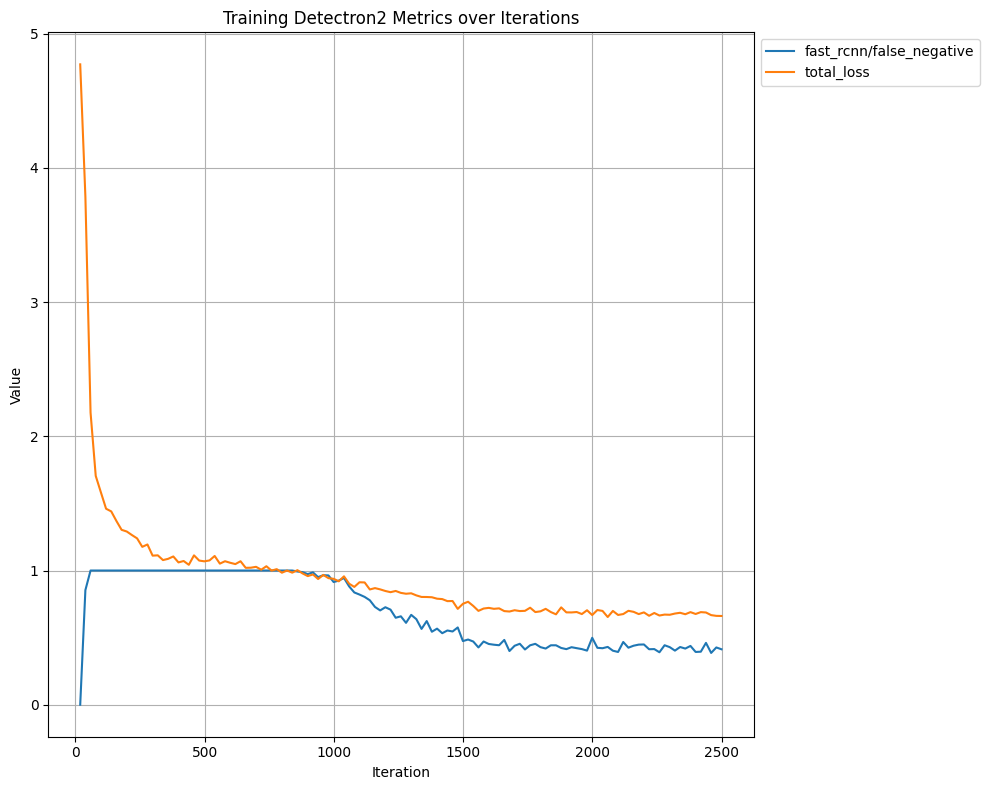

In [86]:
import matplotlib.pyplot as plt
import json

# Path to your JSON file
file_path = '../metrics.json'


# Columns to display on the chart, add or remove column names as needed
columns_to_display = [
    # "data_time",
    # "eta_seconds",
    # "fast_rcnn/cls_accuracy",
    "fast_rcnn/false_negative",
    #"fast_rcnn/fg_cls_accuracy",
    # "iteration",
    # "loss_box_reg",
    # "loss_cls",
    # "loss_rpn_cls",
    # "loss_rpn_loc",
    # "lr",
    # "rank_data_time",
    # "roi_head/num_bg_samples",
    # "roi_head/num_fg_samples",
    # "rpn/num_neg_anchors",
    # "rpn/num_pos_anchors",
    # "time",
    "total_loss"
]

# Read JSON data from file
with open(file_path, 'r') as file:
    json_data = json.load(file)

# Preparing the data
data = {key: [] for key in columns_to_display}
iterations = []

for entry in json_data:
    iterations.append(entry['iteration'])
    for key in columns_to_display:
        if key in entry:  # Check if the key exists in the entry
            data[key].append(entry[key])

# Plotting
plt.figure(figsize=(10, 8))
for key in data:
    plt.plot(iterations, data[key], label=key)

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Training Detectron2 Metrics over Iterations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()